# Logistic Regression

Tingting Yang

INDE 577 - Data Science and Machine Learning

### In Class Practice

In this notebooke, I will implement logistic regression using candidates dataset. 


#### Goal
Given student informaion (such as GMAT score and SAT score), to predict whether the student can be admitted or rejected by the college.

#### Candidates dataset

The candidates dataset is a historical admissions records of the college, which contains 4 columns:
* gmat: The GMAT score of the student
* gpa: The GPA in 4.0 scale of the student
* work_experience: The number of work experience the student had
* admitted: Whether the student be admitted (marked as "1") or rejected (marked as "0") by the college

#### Tools

In order to achieve the goal, we will need the following libraries:

* [pandas](http://pandas.pydata.org)
* [numpy](https://numpy.org/doc/stable/index.html)
* [matplotlib](http://metplotlib.org)
    - Set the backend of matplotlib to the 'inline' backend ([learn more](https://ipython.readthedocs.io/en/stable/interactive/plotting.html))

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# Set the backend of matplotlib to the 'inline' backend
%matplotlib inline 

#### Define Functions 
To implement logistic regression, we need to define the following function:

* Sigmoid Function:
    The sigmoid function formula is
    $$\sigma(z)=\frac{1}{1+e^{-z}}$$


Text(0.5, 1.0, 'Sigmoid Function')

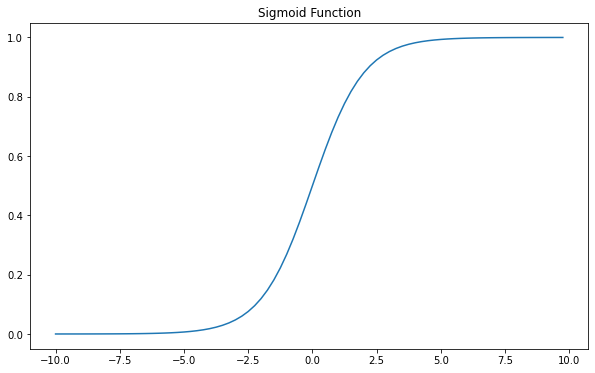

In [2]:
# Define sigmoid function
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

# Plot the curve and check the sigmoid function
domain = np.arange(-10, 10, .25)
plt.figure(figsize=(10, 6))
plt.plot(domain, sigmoid(domain))
plt.title("Sigmoid Function")

* Cross entropy loss (CEL): The formula of CEL is
    $$CEL = -Log[\mathbb{P}(y|x)]=-y log \hat y -(1-y)log(1-\hat y)$$

In [3]:
def cross_entropy_loss(y, y_hat):
    return -y*np.log(y_hat) - (1.0-y)*np.log(1.0-y_hat)

* The derivations of the CEL:
$$\triangledown L[w; (x,y)]=
\begin{bmatrix}
\frac{\partial L}{\partial w_j}=(\hat y-y)x_j\\ 
\frac{\partial L}{\partial b}=\hat y-y
\end{bmatrix}$$

In [4]:
def cross_entropy_gradient(y, y_hat, x, with_bias = True):
    if with_bias == True:
        dw = (y_hat - y)*x
        db = (y_hat - y)
        return dw, db 
    else:
        dw = (y_hat - y)*x
        return dw

* Feed forward function: to feed the sigmoid function

In [5]:
def feed_forward(x, w, b, with_bias = True):
    if with_bias == True:
        return sigmoid(w @ x + b)
    else:
        return sigmoid(w @ x)

* Prediction function: 

In [6]:
def make_prediction(x, w, b):
    y_hat = feed_forward(x, w, b)
    labels = np.array([1, 0])
    return np.random.choice(labels, p = [y_hat, 1.0-y_hat])

#### Implement on the dataset

In [7]:
# Import candidates dataset
df = pd.read_csv("Data/candidates_data.csv")
df.head()

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


We want to use the GMAT score and the GPA of the students as features to predict the admission.

In [8]:
# Extract out desired features from candidates dataset, and covert features to numpy array
X = df[["gmat", "gpa"]].to_numpy()

# Extract out labels, and convert labels to numpy array
Y = df["admitted"].to_numpy()

Text(0.5, 1.0, 'GMAT Score vs. GPA')

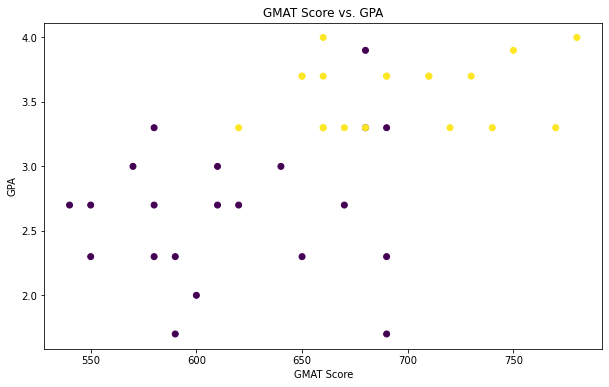

In [9]:
# Plot the scatterplot, and have an overall impression of the data
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.xlabel("GMAT Score")
plt.ylabel("GPA")
plt.title("GMAT Score vs. GPA")

The two predictors are not in the same scale, and we need to rescale them. I will use both scaling to unit length and min-max normalization to scale the data and compare the performance of these two method.

#### Scaling to unit length 

The general formula for Scaling to unit lengthis 
$$x'=\frac{x}{||x||}$$ 
where $x$ is the original value and $x'$ is the normalized value. This means dividing each value by the Euclidean length of the vector.

In [10]:
# Use scaling to unit length to normalize the predictors
X[:, 0] = X[:, 0]/np.linalg.norm(X[:, 0])
X[:, 1] = X[:, 1]/np.linalg.norm(X[:, 1])

Text(0.5, 1.0, 'GMAT Score vs. GPA after Scaling to Unit Length')

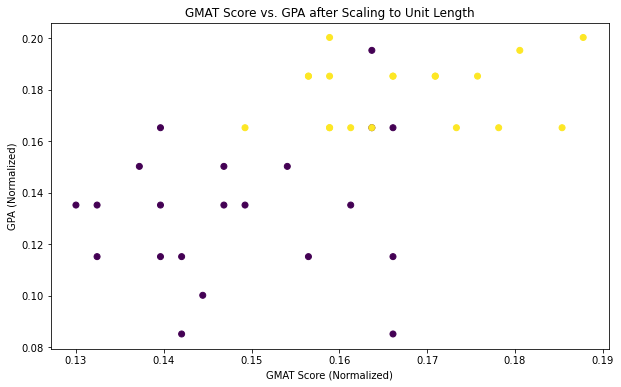

In [11]:
# Plot the scatterplot after scaling to unit length
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.xlabel("GMAT Score (Normalized)")
plt.ylabel("GPA (Normalized)")
plt.title("GMAT Score vs. GPA after Scaling to Unit Length")

After scaling to unit length, both predictors are in the same scale in $[0, 0.2]$.

Text(0, 0.5, 'Accepted or not')

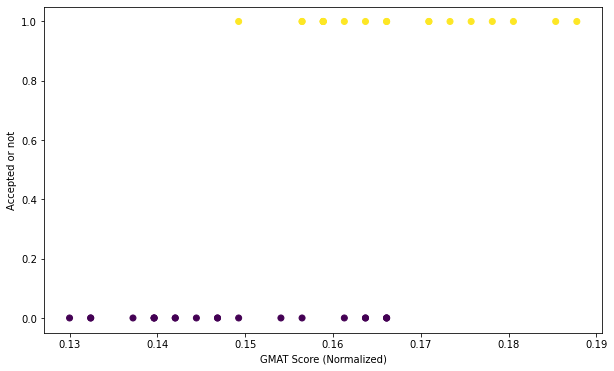

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], Y, c = Y)
plt.xlabel("GMAT Score (Normalized)")
plt.ylabel("Accepted or not")

Text(0, 0.5, 'Accepted or not')

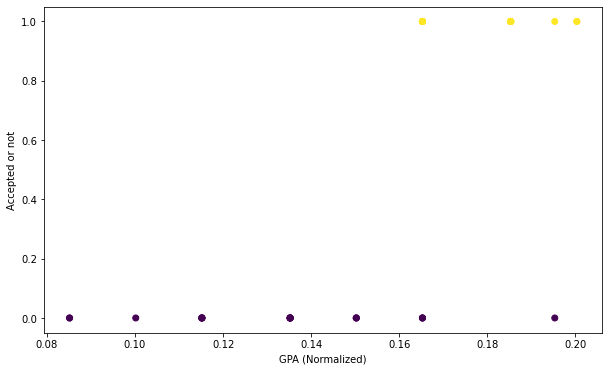

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], Y, c = Y)
plt.xlabel("GPA (Normalized)")
plt.ylabel("Accepted or not")

Let's implement Stochastic Gradient Descent. Set the learning rate at 0.25, and iterate for 10000 times.

In [14]:
# Randomly initial w and b
w = np.random.randn(2)
b = np.random.randn()

# Set up the learning rate
alpha = 0.25

# Implement Stochastic Gradient Descent 
for j in range(10_000):
    i = np.random.randint(len(Y))
    x = X[i, :]
    y = Y[i]
    temp_dw = []
    temp_db = []
    for x, y in zip(X, Y):
        y_hat = feed_forward(x, w, b)
        dw, db = cross_entropy_gradient(y, y_hat, x)
        #w -= alpha*dw
        #b -= alpha*db
        temp_dw.append(dw)
        temp_db.append(db)
        
    dw = sum(temp_dw)/len(temp_dw)
    db = sum(temp_db)/len(temp_db)
    w -= alpha*dw
    b -= alpha*db
    
    total_loss = sum(cross_entropy_loss(Y[i], feed_forward(x, w, b))
                    for i, x in enumerate(X))
    
    # Print the total loss every 1000 iterations
    if j % 1_000 == 0:
        print(f"Total Loss at time {j+1} = {total_loss}")

Total Loss at time 1 = 49.12539776668973
Total Loss at time 1001 = 26.238581481783292
Total Loss at time 2001 = 25.039492247946402
Total Loss at time 3001 = 23.978791650750082
Total Loss at time 4001 = 23.038074818149965
Total Loss at time 5001 = 22.201188708097398
Total Loss at time 6001 = 21.454130862636344
Total Loss at time 7001 = 20.78486267627245
Total Loss at time 8001 = 20.183086349048338
Total Loss at time 9001 = 19.640016671812276


The algorithm works well. The total loss gradually decreases.

And then we can use our algorithm to predict, compare with the true label, and calculate the accurary of our prediction.

In [15]:
hits = 0
for x, y in zip(X, Y):
    
    # Predict using our algorithm
    y_hat = make_prediction(x, w, b)
    
    # compare whether the prediction is the same as the real label
    hits += int(y_hat == y)
    
    print(f"Prediction: {y_hat}")
    print(f"True label: {y}")
    print()

# Calculate the accuracy and print it
print(f"Classification Percentage = {100* (hits/len(Y))}%")

Prediction: 0
True label: 1

Prediction: 1
True label: 1

Prediction: 1
True label: 0

Prediction: 0
True label: 1

Prediction: 1
True label: 0

Prediction: 1
True label: 1

Prediction: 1
True label: 0

Prediction: 1
True label: 1

Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 1
True label: 0

Prediction: 1
True label: 1

Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 1
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 1
True label: 0

Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 1
True label: 1

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 1
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 1

Prediction: 1


The accuracy is 60.0%. The performance is not satisfying. 

Let's try another method of normalization.

#### Min-max Normalization

The general formula for min-max normalization is 
$$x'=\frac{x-min(x)}{max(x)-min(x)}$$
where $x$ is the original value and $x'$ is the normalized value.

In [16]:
# Extract out desired features from candidates dataset, and covert features to numpy array
X = df[["gmat", "gpa"]].to_numpy()

# Extract out labels, and convert labels to numpy array
Y = df["admitted"].to_numpy()

In [17]:
# Use min-max normalization to normalize the predictors
X[:, 0] = (X[:, 0] - np.min(X[:, 0]))/(np.max(X[:, 0] - np.min(X[:, 0])))
X[:, 1] = (X[:, 1] - np.min(X[:, 1]))/(np.max(X[:, 1] - np.min(X[:, 1])))

Text(0.5, 1.0, 'GMAT Score vs. GPA after Min-Max Normalization')

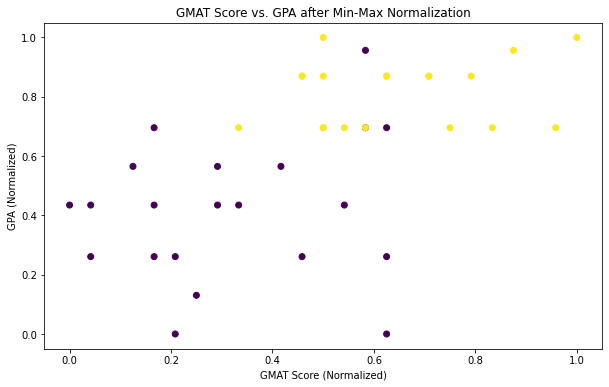

In [18]:
# Plot the scatterplot after scaling to unit length
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.xlabel("GMAT Score (Normalized)")
plt.ylabel("GPA (Normalized)")
plt.title("GMAT Score vs. GPA after Min-Max Normalization")

After scaling to unit length, both predictors are in the same scale in $[0,1]$.

Text(0, 0.5, 'Accepted or not')

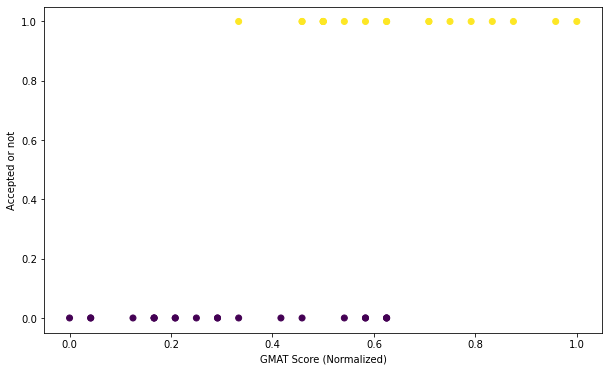

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], Y, c = Y)
plt.xlabel("GMAT Score (Normalized)")
plt.ylabel("Accepted or not")

Text(0, 0.5, 'Accepted or not')

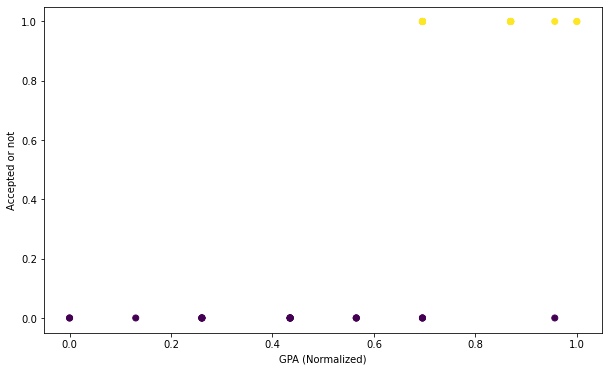

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], Y, c = Y)
plt.xlabel("GPA (Normalized)")
plt.ylabel("Accepted or not")

Similarly, for implement Stochastic Gradient Descent, set the learning rate at 0.25 and iterate for 10000 times.

In [21]:
# Randomly initial w and b
w = np.random.randn(2)
b = np.random.randn()

# Set up the learning rate
alpha = 0.25

# Implement Stochastic Gradient Descent 
for j in range(10_000):
    i = np.random.randint(len(Y))
    x = X[i, :]
    y = Y[i]
    temp_dw = []
    temp_db = []
    for x, y in zip(X, Y):
        y_hat = feed_forward(x, w, b)
        dw, db = cross_entropy_gradient(y, y_hat, x)
        #w -= alpha*dw
        #b -= alpha*db
        temp_dw.append(dw)
        temp_db.append(db)
        
    dw = sum(temp_dw)/len(temp_dw)
    db = sum(temp_db)/len(temp_db)
    w -= alpha*dw
    b -= alpha*db
    
    total_loss = sum(cross_entropy_loss(Y[i], feed_forward(x, w, b))
                    for i, x in enumerate(X))
    # Print the total loss every 1000 iterations
    if j % 1_000 == 0:
        print(f"Total Loss at time {j+1} = {total_loss}")

Total Loss at time 1 = 31.939755338552818
Total Loss at time 1001 = 11.891323512598666
Total Loss at time 2001 = 11.141027897316954
Total Loss at time 3001 = 10.917322537695775
Total Loss at time 4001 = 10.825726051811369
Total Loss at time 5001 = 10.782011804872793
Total Loss at time 6001 = 10.759190047455503
Total Loss at time 7001 = 10.746569056241512
Total Loss at time 8001 = 10.739312136575672
Total Loss at time 9001 = 10.735024218064927


The algorithm works well. The total loss gradually decreases. 

And then we then also use the algorithm to predict, compare with the true label, and calculate the accurary of the prediction.

In [22]:
hits = 0
for x, y in zip(X, Y):
    
    # Predict using our algorithm
    y_hat = make_prediction(x, w, b)
    
    # compare whether the prediction is the same as the real label
    hits += int(y_hat == y)
    
    print(f"Prediction: {y_hat}")
    print(f"True label: {y}")
    print()

# Calculate the accuracy and print it
print(f"Classification Percentage = {100* (hits/len(Y))}%")

Prediction: 1
True label: 1

Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 1
True label: 1

Prediction: 1
True label: 0

Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 1
True label: 1

Prediction: 1
True label: 1

Prediction: 1
True label: 0

Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 1
True label: 1

Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 1
True label: 1

Prediction: 0
True label: 1

Prediction: 1


The accuracy is 80.0%, which is better than the accuracy when using the method of scaling to unit length.

#### Conclusion

Our algorithm works well. 

Different data normalization methods affect the performance of the algorithm. For the candidates dataset, min-max normalization works better than scaling to the unit length, when using GMAT score and GPA to predict the admission of the college.